In [145]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [146]:
# device = torch.device('cpu')
# device

In [147]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [148]:
import ta as ta


In [85]:
# import yfinance as yf

# # Define the ticker symbol
# ticker_symbol = "^GSPC"

# # Get data on this ticker
# sp500_data = yf.Ticker(ticker_symbol)

# # Get historical market data
# historical_data = sp500_data.history(interval="1m", start="2024-05-20", end="2024-05-27")



In [216]:
import requests
import pandas as pd

api_key = 'XPQXF0VKO06IFUEJ'
symbol = 'SPY'
interval = '1min'
outputsize = 'full'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&outputsize={outputsize}&apikey={api_key}'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['Time Series (1min)']).T
df.columns = ['open', 'high', 'low', 'close', 'volume']
df.index = pd.to_datetime(df.index)
historical_data = df.astype(float)



In [217]:
import pandas as pd
import ta

# Load your stock data


# Calculate technical indicators
historical_data['MA50'] = ta.trend.sma_indicator(historical_data['close'], window=14)
historical_data['RSI'] = ta.momentum.rsi(historical_data['close'], window=14)
historical_data['MACD'] = ta.trend.macd(historical_data['close'])
historical_data['ROC'] = ta.momentum.roc(historical_data['close'])
historical_data['OBV'] = ta.volume.on_balance_volume(historical_data['close'], historical_data['volume'])

# Add more indicators as needed

# Drop rows with NaN values (resulting from the indicator calculation)
historical_data = historical_data.dropna()


In [218]:

# historical_data = historical_data[1:]
historical_data

,open,high,low,close,volume,MA50,RSI,MACD,ROC,OBV
2024-06-12 19:35:00,542.12,542.140,542.06,542.140,36.0,542.138929,64.130689,0.094272,-0.003689,1171976.0
2024-06-12 19:34:00,542.12,542.140,542.12,542.140,153.0,542.140357,64.130689,0.088350,-0.007378,1172129.0
2024-06-12 19:33:00,542.14,542.150,542.10,542.130,18.0,542.138214,62.487560,0.081905,-0.004611,1172111.0
2024-06-12 19:32:00,542.10,542.135,542.08,542.135,33.0,542.135000,62.998048,0.076322,-0.004611,1172144.0
2024-06-12 19:31:00,542.10,542.130,542.05,542.120,652.0,542.132500,60.344931,0.069880,0.001845,1171492.0
...,...,...,...,...,...,...,...,...,...,...
2024-05-14 04:05:00,521.07,521.090,521.04,521.090,120.0,521.040714,51.341320,-0.029069,-0.003838,-31778537.0
2024-05-14 04:03:00,521.05,521.090,521.03,521.030,348.0,521.035000,43.773578,-0.028513,-0.005757,-31778885.0
2024-05-14 04:02:00,521.02,521.080,521.02,521.080,43.0,521.032857,50.342413,-0.023764,0.005758,-31778842.0
2024-05-14 04:01:00,520.99,521.030,520.99,521.030,20.0,521.030714,44.716415,-0.023761,0.000000,-31778862.0


In [221]:
historical_data = historical_data.drop(['open', 'high','low'], axis=1)

<Axes: >

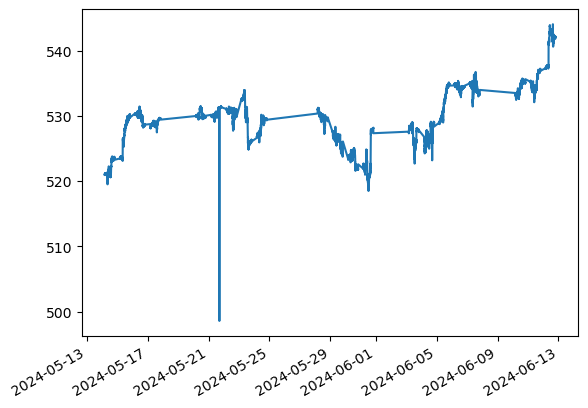

In [222]:
historical_data['close'].plot()

In [223]:
historical_data

,close,volume,MA50,RSI,MACD,ROC,OBV
2024-06-12 19:35:00,542.140,36.0,542.138929,64.130689,0.094272,-0.003689,1171976.0
2024-06-12 19:34:00,542.140,153.0,542.140357,64.130689,0.088350,-0.007378,1172129.0
2024-06-12 19:33:00,542.130,18.0,542.138214,62.487560,0.081905,-0.004611,1172111.0
2024-06-12 19:32:00,542.135,33.0,542.135000,62.998048,0.076322,-0.004611,1172144.0
2024-06-12 19:31:00,542.120,652.0,542.132500,60.344931,0.069880,0.001845,1171492.0
...,...,...,...,...,...,...,...
2024-05-14 04:05:00,521.090,120.0,521.040714,51.341320,-0.029069,-0.003838,-31778537.0
2024-05-14 04:03:00,521.030,348.0,521.035000,43.773578,-0.028513,-0.005757,-31778885.0
2024-05-14 04:02:00,521.080,43.0,521.032857,50.342413,-0.023764,0.005758,-31778842.0
2024-05-14 04:01:00,521.030,20.0,521.030714,44.716415,-0.023761,0.000000,-31778862.0


In [224]:
historical_data_reversed_rows = historical_data.iloc[::-1].reset_index(drop=True)
print(historical_data_reversed_rows)


         close  volume        MA50        RSI      MACD       ROC         OBV
0      521.030   144.0  521.029286  44.716415 -0.023487  0.000000 -31778718.0
1      521.030    20.0  521.030714  44.716415 -0.023761  0.000000 -31778862.0
2      521.080    43.0  521.032857  50.342413 -0.023764  0.005758 -31778842.0
3      521.030   348.0  521.035000  43.773578 -0.028513 -0.005757 -31778885.0
4      521.090   120.0  521.040714  51.341320 -0.029069 -0.003838 -31778537.0
...        ...     ...         ...        ...       ...       ...         ...
19678  542.120   652.0  542.132500  60.344931  0.069880  0.001845   1171492.0
19679  542.135    33.0  542.135000  62.998048  0.076322 -0.004611   1172144.0
19680  542.130    18.0  542.138214  62.487560  0.081905 -0.004611   1172111.0
19681  542.140   153.0  542.140357  64.130689  0.088350 -0.007378   1172129.0
19682  542.140    36.0  542.138929  64.130689  0.094272 -0.003689   1171976.0

[19683 rows x 7 columns]


In [225]:
historical_data = historical_data_reversed_rows

In [226]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random


In [227]:
import gym
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        
        self.df = df
        self.current_step = 0
        self.prev_step =0
        self.balance = 1000000
        self.shares_held = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.max_steps = len(df) - 1
        
        self.action_space = gym.spaces.Discrete(3)  # 0: Hold, 1: Buy, 2: Sell
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(7,), dtype=np.float32)

        self.No_of_transactions =0
        
    
    def reset(self):
        self.current_step = 0
        self.prev_step =0
        self.balance = 1000000
        
        self.shares_held = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.No_of_transactions =0

        return self._get_observation()
    
    def _get_observation(self):
        return np.array([
            # self.balance,
            # self.shares_held,
            # # self.total_shares_sold,
            # self.total_sales_value,
            self.df.iloc[self.current_step]['close'],
            self.df.iloc[self.current_step]['volume'],
            self.df.iloc[self.current_step]['MA50'],
            self.df.iloc[self.current_step]['RSI'],
            self.df.iloc[self.current_step]['MACD'],
            self.df.iloc[self.current_step]['ROC'],
            self.df.iloc[self.current_step]['OBV']
        
        ])
    def _get_primary_observations(self):
        return np.array([
            self.balance,
            self.shares_held,
            self.No_of_transactions,
          
          
            
        
        ])
    
    def step(self, action):
        current_price = self.df.iloc[self.current_step]['close']
      
        prev_val = self.balance + self.shares_held*self.df.iloc[self.prev_step]['close']
        
        reward =0
        if action == 1:  # Buy'
            if self.balance >current_price:
                self.prev_step = self.current_step

            self.shares_held += self.balance // current_price
            self.balance %= current_price
            
            reward =0
        
        elif action == 2:  # Sell
            if(self.shares_held!=0):
                self.No_of_transactions +=1
            self.balance += self.shares_held * current_price
            self.total_shares_sold += self.shares_held
            self.total_sales_value += self.shares_held * current_price
            self.shares_held = 0
            reward = self.balance  -prev_val
        
        self.current_step += 1
        done = self.current_step >= self.max_steps
        # reward = self.balance + self.shares_held * current_price + self.total_sales_value
       
        
        return self._get_observation(), reward, done, {}
    
    def render(self, mode='human'):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total sales value: {self.total_sales_value}')

# Example usage
data = historical_data
env = StockTradingEnv(data)


In [228]:
import torch
import torch.nn as nn
import torch.optim as optim

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32,64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,8)
        self.fc7 = nn.Linear(8,4)
        self.fc8 = nn.Linear(4, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = self.fc8(x)
        return x


In [229]:

# Example usage
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n
policy_net = DQN(input_dim, output_dim)
target_net = DQN(input_dim, output_dim)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
input_dim

7

In [230]:
import random
from collections import deque

class DQNAgent:
    def __init__(self, env, policy_net, target_net, batch_size=4096, gamma=0.99, epsilon_start=1.0, epsilon_end=0.01, epsilon_decay=0.995):
        self.env = env
        self.policy_net = policy_net
        self.target_net = target_net
        self.batch_size = batch_size
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=10000)
        self.optimizer = optim.Adam(policy_net.parameters())
        self.loss_fn = nn.MSELoss()
    
    def select_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        with torch.no_grad():
            state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
            q_values = self.policy_net(state)
            return q_values.argmax().item()
    
    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def sample_memory(self):
        return random.sample(self.memory, self.batch_size)
    
    def update_policy(self):
        if len(self.memory) < self.batch_size:
            return
        
        transitions = self.sample_memory()
        batch = list(zip(*transitions))
        
        states = torch.tensor(batch[0], dtype=torch.float32).to(device)
        actions = torch.tensor(batch[1], dtype=torch.long).unsqueeze(1).to(device)
        rewards = torch.tensor(batch[2], dtype=torch.float32).unsqueeze(1).to(device)
        next_states = torch.tensor(batch[3], dtype=torch.float32).to(device)
        dones = torch.tensor(batch[4], dtype=torch.float32).unsqueeze(1).to(device)

        
        current_q_values = self.policy_net(states).gather(1, actions)
        max_next_q_values = self.target_net(next_states).max(1)[0].unsqueeze(1)
        expected_q_values = rewards + self.gamma * max_next_q_values * (1 - dones)
        
        loss = self.loss_fn(current_q_values, expected_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)

# Example usage



In [231]:
policy_net.to(device)
target_net.to(device)
agent = DQNAgent(env, policy_net, target_net)

In [232]:
num_episodes = 100
from tqdm import tqdm
for episode in tqdm(range(num_episodes)):
    state = env.reset()
    total_reward = 0
    
    while True:
        action = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)
        balance,shares_held,no_oftrans = env._get_primary_observations()
        
        agent.store_transition(state, action, reward, next_state, done)
        agent.update_policy()
        state = next_state
        total_reward += reward
        # print(f'Episode {episode + 1}, Total Reward: {total_reward}')
        
        if done:
            print(f'Episode {episode + 1}, Total Reward: {total_reward}')
            print(f'Number of transcations: {no_oftrans}  , Balance: {balance}, shares held: {shares_held} ' )
            break
    
    # Update the target network
    if episode % 10 == 0:
        target_net.load_state_dict(policy_net.state_dict())
        torch.save(policy_net.state_dict(), f'dqn_model.pth {episode +1}')

# Save the trained model
torch.save(policy_net.state_dict(), 'dqn_model.pth')


  1%|          | 1/100 [07:00<11:33:18, 420.19s/it]

Episode 1, Total Reward: 9067.62499999965
Number of transcations: 973.0  , Balance: 1009067.6249999995, shares held: 0.0 


  2%|▏         | 2/100 [16:08<13:29:15, 495.47s/it]

Episode 2, Total Reward: 16021.14000000211
Number of transcations: 469.0  , Balance: 1016021.1400000021, shares held: 0.0 


  3%|▎         | 3/100 [25:12<13:56:44, 517.58s/it]

Episode 3, Total Reward: 11532.414000002434
Number of transcations: 378.0  , Balance: 1011532.4140000024, shares held: 0.0 


  4%|▍         | 4/100 [34:19<14:06:43, 529.20s/it]

Episode 4, Total Reward: 16466.97599999525
Number of transcations: 802.0  , Balance: 1015934.6959999955, shares held: 0.0 


  5%|▌         | 5/100 [43:17<14:03:18, 532.62s/it]

Episode 5, Total Reward: 13120.674000002327
Number of transcations: 778.0  , Balance: 1013120.6740000024, shares held: 0.0 


  6%|▌         | 6/100 [52:21<14:00:19, 536.37s/it]

Episode 6, Total Reward: 13554.93399999896
Number of transcations: 801.0  , Balance: 1013554.933999999, shares held: 0.0 


  7%|▋         | 7/100 [1:01:32<13:58:38, 541.06s/it]

Episode 7, Total Reward: 709.4769999999553
Number of transcations: 670.0  , Balance: 1000709.477, shares held: 0.0 


  8%|▊         | 8/100 [1:10:48<13:56:48, 545.74s/it]

Episode 8, Total Reward: 12861.435000003316
Number of transcations: 420.0  , Balance: 1012861.4350000033, shares held: 0.0 


  9%|▉         | 9/100 [1:20:04<13:52:36, 548.98s/it]

Episode 9, Total Reward: 13225.062000000966
Number of transcations: 153.0  , Balance: 1013225.062000001, shares held: 0.0 


 10%|█         | 10/100 [1:29:24<13:48:44, 552.49s/it]

Episode 10, Total Reward: 11815.522999999346
Number of transcations: 201.0  , Balance: 1011815.5229999993, shares held: 0.0 


 11%|█         | 11/100 [1:38:39<13:40:27, 553.11s/it]

Episode 11, Total Reward: 16025.671999997227
Number of transcations: 371.0  , Balance: 1016025.6719999973, shares held: 0.0 


 12%|█▏        | 12/100 [1:47:54<13:32:12, 553.78s/it]

Episode 12, Total Reward: 20588.03900000162
Number of transcations: 283.0  , Balance: 1020588.0390000017, shares held: 0.0 


 13%|█▎        | 13/100 [1:57:01<13:20:04, 551.78s/it]

Episode 13, Total Reward: 10780.033999999985
Number of transcations: 728.0  , Balance: 1010780.0340000001, shares held: 0.0 


 14%|█▍        | 14/100 [2:08:40<14:14:37, 596.25s/it]

Episode 14, Total Reward: -5700.331999999238
Number of transcations: 400.0  , Balance: 994299.6680000008, shares held: 0.0 


 15%|█▌        | 15/100 [2:24:26<16:33:57, 701.62s/it]

Episode 15, Total Reward: 5038.618000001647
Number of transcations: 577.0  , Balance: 1005038.6180000016, shares held: 0.0 


 16%|█▌        | 16/100 [2:39:47<17:54:37, 767.59s/it]

Episode 16, Total Reward: 15600.043999998481
Number of transcations: 393.0  , Balance: 1015600.0439999985, shares held: 0.0 


 17%|█▋        | 17/100 [2:58:13<20:02:41, 869.42s/it]

Episode 17, Total Reward: 3102.294000000693
Number of transcations: 688.0  , Balance: 1003102.2940000007, shares held: 0.0 


 18%|█▊        | 18/100 [3:16:10<21:13:36, 931.91s/it]

Episode 18, Total Reward: 71448.83399999712
Number of transcations: 530.0  , Balance: 1071448.8339999972, shares held: 0.0 


 19%|█▉        | 19/100 [3:31:00<20:40:57, 919.23s/it]

Episode 19, Total Reward: 23721.508999998332
Number of transcations: 915.0  , Balance: 1023721.5089999982, shares held: 0.0 


 20%|██        | 20/100 [3:40:02<17:54:45, 806.07s/it]

Episode 20, Total Reward: 18789.634000002872
Number of transcations: 339.0  , Balance: 1018789.6340000031, shares held: 0.0 


 21%|██        | 21/100 [3:49:09<15:58:45, 728.17s/it]

Episode 21, Total Reward: 13396.564000002458
Number of transcations: 982.0  , Balance: 1013396.5640000025, shares held: 0.0 


 22%|██▏       | 22/100 [3:58:14<14:35:12, 673.24s/it]

Episode 22, Total Reward: -449.77400000032503
Number of transcations: 782.0  , Balance: 999550.2259999997, shares held: 0.0 


 23%|██▎       | 23/100 [4:06:54<13:24:48, 627.12s/it]

Episode 23, Total Reward: -4619.442999998573
Number of transcations: 917.0  , Balance: 48.23700000153485, shares held: 1836.0 


 24%|██▍       | 24/100 [4:15:36<12:34:32, 595.70s/it]

Episode 24, Total Reward: 22337.054000002332
Number of transcations: 915.0  , Balance: 440.85400000232346, shares held: 1885.0 


 25%|██▌       | 25/100 [4:24:30<12:01:26, 577.15s/it]

Episode 25, Total Reward: 11806.550999998464
Number of transcations: 607.0  , Balance: 1011806.5509999985, shares held: 0.0 


 26%|██▌       | 26/100 [4:33:15<11:32:35, 561.56s/it]

Episode 26, Total Reward: 9927.974999999045
Number of transcations: 787.0  , Balance: 388.8149999990221, shares held: 1862.0 


 27%|██▋       | 27/100 [4:42:09<11:13:06, 553.24s/it]

Episode 27, Total Reward: 1461.7150000015972
Number of transcations: 797.0  , Balance: 1001461.7150000016, shares held: 0.0 


 28%|██▊       | 28/100 [5:33:33<26:14:56, 1312.45s/it]

Episode 28, Total Reward: 5424.734999998822
Number of transcations: 215.0  , Balance: 1005424.7349999988, shares held: 0.0 


 29%|██▉       | 29/100 [5:53:13<25:06:20, 1272.97s/it]

Episode 29, Total Reward: 9738.026999996626
Number of transcations: 476.0  , Balance: 1009738.0269999965, shares held: 0.0 


 30%|███       | 30/100 [6:13:03<24:16:05, 1248.07s/it]

Episode 30, Total Reward: 6904.922000002116
Number of transcations: 514.0  , Balance: 58.092000002131044, shares held: 1857.0 


 31%|███       | 31/100 [6:35:14<24:23:48, 1272.87s/it]

Episode 31, Total Reward: -53345.890999998664
Number of transcations: 370.0  , Balance: 432.7090000013276, shares held: 1745.0 


 32%|███▏      | 32/100 [11:01:20<107:18:15, 5680.81s/it]

Episode 32, Total Reward: 7670.007999998634
Number of transcations: 520.0  , Balance: 1007670.0079999984, shares held: 0.0 


 33%|███▎      | 33/100 [11:10:36<77:06:37, 4143.24s/it] 

Episode 33, Total Reward: 8520.054999998305
Number of transcations: 555.0  , Balance: 2.304999998304993, shares held: 1859.0 


 34%|███▍      | 34/100 [11:19:58<56:15:43, 3068.84s/it]

Episode 34, Total Reward: 14259.940000001574
Number of transcations: 515.0  , Balance: 1014202.4600000017, shares held: 0.0 


 35%|███▌      | 35/100 [11:29:13<41:47:40, 2314.77s/it]

Episode 35, Total Reward: 14715.312999998569
Number of transcations: 719.0  , Balance: 1014715.3129999986, shares held: 0.0 


 36%|███▌      | 36/100 [11:38:30<31:46:38, 1787.48s/it]

Episode 36, Total Reward: 2367.644999999902
Number of transcations: 621.0  , Balance: 446.72499999996944, shares held: 1848.0 


 37%|███▋      | 37/100 [11:47:49<24:49:57, 1419.01s/it]

Episode 37, Total Reward: 8148.932000000961
Number of transcations: 551.0  , Balance: 1008148.932000001, shares held: 0.0 


 38%|███▊      | 38/100 [11:57:08<19:59:36, 1160.91s/it]

Episode 38, Total Reward: 17931.684999999474
Number of transcations: 456.0  , Balance: 241.05499999937138, shares held: 1877.0 


 39%|███▉      | 39/100 [12:06:26<16:36:32, 980.20s/it] 

Episode 39, Total Reward: 18485.22599999723
Number of transcations: 291.0  , Balance: 1018485.2259999972, shares held: 0.0 


 40%|████      | 40/100 [12:15:45<14:13:46, 853.78s/it]

Episode 40, Total Reward: 3472.7649999996647
Number of transcations: 316.0  , Balance: 1003472.7649999995, shares held: 0.0 


 41%|████      | 41/100 [12:25:02<12:31:50, 764.58s/it]

Episode 41, Total Reward: 16242.937999999383
Number of transcations: 143.0  , Balance: 1016242.9379999994, shares held: 0.0 


 42%|████▏     | 42/100 [12:34:24<11:20:30, 703.98s/it]

Episode 42, Total Reward: 6379.593000000226
Number of transcations: 263.0  , Balance: 1006379.5930000001, shares held: 0.0 


 43%|████▎     | 43/100 [12:43:52<10:29:48, 662.95s/it]

Episode 43, Total Reward: -3461.2770000008168
Number of transcations: 358.0  , Balance: 996538.7229999992, shares held: 0.0 


 44%|████▍     | 44/100 [12:53:20<9:52:21, 634.67s/it] 

Episode 44, Total Reward: 11702.114000000409
Number of transcations: 301.0  , Balance: 1011702.1140000004, shares held: 0.0 


 45%|████▌     | 45/100 [13:02:46<9:22:42, 613.86s/it]

Episode 45, Total Reward: 14376.580999999307
Number of transcations: 491.0  , Balance: 107.48099999926455, shares held: 1871.0 


 46%|████▌     | 46/100 [13:12:16<9:00:50, 600.94s/it]

Episode 46, Total Reward: 8324.318000002648
Number of transcations: 581.0  , Balance: 1008324.3180000026, shares held: 0.0 


 47%|████▋     | 47/100 [13:22:29<8:53:58, 604.50s/it]

Episode 47, Total Reward: 14123.307000002591
Number of transcations: 567.0  , Balance: 1014123.3070000026, shares held: 0.0 


 48%|████▊     | 48/100 [13:36:44<9:49:00, 679.62s/it]

Episode 48, Total Reward: -3846.2890000018524
Number of transcations: 731.0  , Balance: 996153.710999998, shares held: 0.0 


 49%|████▉     | 49/100 [13:48:45<9:48:10, 691.97s/it]

Episode 49, Total Reward: 4723.21799999848
Number of transcations: 285.0  , Balance: 1004723.2179999985, shares held: 0.0 


 50%|█████     | 50/100 [14:00:12<9:35:34, 690.69s/it]

Episode 50, Total Reward: 10480.440000002855
Number of transcations: 617.0  , Balance: 1010480.4400000029, shares held: 0.0 


 51%|█████     | 51/100 [14:12:47<9:39:47, 709.95s/it]

Episode 51, Total Reward: 16032.90899999917
Number of transcations: 558.0  , Balance: 1016032.908999999, shares held: 0.0 


 52%|█████▏    | 52/100 [14:26:34<9:55:55, 744.90s/it]

Episode 52, Total Reward: -35733.367999995244
Number of transcations: 585.0  , Balance: 963749.5620000046, shares held: 0.0 


 53%|█████▎    | 53/100 [14:39:41<9:53:21, 757.48s/it]

Episode 53, Total Reward: 21785.23499999824
Number of transcations: 409.0  , Balance: 1021785.2349999982, shares held: 0.0 


 54%|█████▍    | 54/100 [14:52:06<9:37:57, 753.86s/it]

Episode 54, Total Reward: 673.0720000019064
Number of transcations: 430.0  , Balance: 1000673.0720000019, shares held: 0.0 


 55%|█████▌    | 55/100 [15:03:59<9:16:10, 741.56s/it]

Episode 55, Total Reward: 15136.429000006756
Number of transcations: 1108.0  , Balance: 1014845.8040000066, shares held: 0.0 


 56%|█████▌    | 56/100 [15:15:53<8:57:51, 733.44s/it]

Episode 56, Total Reward: 17829.841000003275
Number of transcations: 873.0  , Balance: 1017829.8410000033, shares held: 0.0 


 57%|█████▋    | 57/100 [15:27:53<8:42:38, 729.26s/it]

Episode 57, Total Reward: 3574.457999996026
Number of transcations: 908.0  , Balance: 1003574.457999996, shares held: 0.0 


 58%|█████▊    | 58/100 [15:39:40<8:25:53, 722.70s/it]

Episode 58, Total Reward: 3720.0550000021467
Number of transcations: 750.0  , Balance: 1003720.0550000021, shares held: 0.0 


 59%|█████▉    | 59/100 [15:51:30<8:11:05, 718.66s/it]

Episode 59, Total Reward: 20310.58200000541
Number of transcations: 1076.0  , Balance: 1020310.5820000054, shares held: 0.0 


 60%|██████    | 60/100 [16:03:17<7:56:45, 715.14s/it]

Episode 60, Total Reward: 24421.177000002936
Number of transcations: 765.0  , Balance: 1024421.1770000028, shares held: 0.0 


 61%|██████    | 61/100 [16:15:02<7:42:55, 712.20s/it]

Episode 61, Total Reward: 24347.74599999888
Number of transcations: 440.0  , Balance: 1024347.7459999989, shares held: 0.0 


 62%|██████▏   | 62/100 [16:26:48<7:29:57, 710.47s/it]

Episode 62, Total Reward: 2562.946999996435
Number of transcations: 746.0  , Balance: 1002562.9469999963, shares held: 0.0 


 63%|██████▎   | 63/100 [16:38:33<7:17:02, 708.73s/it]

Episode 63, Total Reward: 6322.136999998824
Number of transcations: 839.0  , Balance: 1006322.1369999988, shares held: 0.0 


 64%|██████▍   | 64/100 [16:50:17<7:04:26, 707.41s/it]

Episode 64, Total Reward: 12596.225999999791
Number of transcations: 626.0  , Balance: 1012596.2259999998, shares held: 0.0 


 65%|██████▌   | 65/100 [17:02:03<6:52:18, 706.81s/it]

Episode 65, Total Reward: 21068.92200000293
Number of transcations: 494.0  , Balance: 1021068.9220000029, shares held: 0.0 


 66%|██████▌   | 66/100 [17:13:48<6:40:14, 706.30s/it]

Episode 66, Total Reward: 7028.1000000010245
Number of transcations: 976.0  , Balance: 1007028.100000001, shares held: 0.0 


 67%|██████▋   | 67/100 [17:25:31<6:27:53, 705.26s/it]

Episode 67, Total Reward: 9133.525999997626
Number of transcations: 1025.0  , Balance: 1009133.5259999976, shares held: 0.0 


 68%|██████▊   | 68/100 [17:37:16<6:16:12, 705.40s/it]

Episode 68, Total Reward: 8697.296999999788
Number of transcations: 665.0  , Balance: 1008697.2969999998, shares held: 0.0 


 69%|██████▉   | 69/100 [17:49:00<6:04:08, 704.79s/it]

Episode 69, Total Reward: -731.6250000006985
Number of transcations: 64.0  , Balance: 999268.3749999993, shares held: 0.0 


 70%|███████   | 70/100 [18:00:44<5:52:21, 704.71s/it]

Episode 70, Total Reward: 18989.73599999922
Number of transcations: 562.0  , Balance: 1018989.735999999, shares held: 0.0 


 71%|███████   | 71/100 [18:12:28<5:40:28, 704.45s/it]

Episode 71, Total Reward: -2093.9710000013
Number of transcations: 666.0  , Balance: 997906.0289999986, shares held: 0.0 


 72%|███████▏  | 72/100 [18:24:12<5:28:44, 704.43s/it]

Episode 72, Total Reward: 78092.77299999818
Number of transcations: 798.0  , Balance: 1016557.1889999982, shares held: 0.0 


 73%|███████▎  | 73/100 [18:35:55<5:16:45, 703.92s/it]

Episode 73, Total Reward: 23921.44000000111
Number of transcations: 621.0  , Balance: 1023921.4400000011, shares held: 0.0 


 74%|███████▍  | 74/100 [18:47:38<5:04:56, 703.70s/it]

Episode 74, Total Reward: 8052.16200000199
Number of transcations: 762.0  , Balance: 1008052.1620000019, shares held: 0.0 


 75%|███████▌  | 75/100 [18:59:23<4:53:17, 703.88s/it]

Episode 75, Total Reward: -55744.467999994056
Number of transcations: 449.0  , Balance: 943833.3720000061, shares held: 0.0 


 76%|███████▌  | 76/100 [19:11:09<4:41:53, 704.74s/it]

Episode 76, Total Reward: 2319.7199999972945
Number of transcations: 628.0  , Balance: 454.2399999973113, shares held: 1848.0 


 77%|███████▋  | 77/100 [19:22:54<4:30:05, 704.58s/it]

Episode 77, Total Reward: 11306.263999997173
Number of transcations: 793.0  , Balance: 1011306.2639999972, shares held: 0.0 


 78%|███████▊  | 78/100 [19:34:38<4:18:21, 704.61s/it]

Episode 78, Total Reward: 15673.72899999679
Number of transcations: 739.0  , Balance: 1015673.7289999968, shares held: 0.0 


 79%|███████▉  | 79/100 [19:46:44<4:08:46, 710.79s/it]

Episode 79, Total Reward: 7255.174000001047
Number of transcations: 691.0  , Balance: 1006223.3490000011, shares held: 0.0 


 80%|████████  | 80/100 [19:58:29<3:56:21, 709.06s/it]

Episode 80, Total Reward: 30753.268999999156
Number of transcations: 365.0  , Balance: 107.10899999921673, shares held: 1901.0 


 81%|████████  | 81/100 [20:10:10<3:43:46, 706.67s/it]

Episode 81, Total Reward: 40657.98299999919
Number of transcations: 84.0  , Balance: 469.04299999923046, shares held: 1918.0 


 82%|████████▏ | 82/100 [20:21:53<3:31:43, 705.76s/it]

Episode 82, Total Reward: 12088.716999999364
Number of transcations: 89.0  , Balance: 81.36699999944881, shares held: 1867.0 


 83%|████████▎ | 83/100 [20:33:45<3:20:26, 707.43s/it]

Episode 83, Total Reward: 20361.26499999885
Number of transcations: 104.0  , Balance: 223.1649999989354, shares held: 1882.0 


 84%|████████▍ | 84/100 [20:45:30<3:08:28, 706.75s/it]

Episode 84, Total Reward: -1386.6410000000615
Number of transcations: 74.0  , Balance: 295.40899999978024, shares held: 1842.0 


 85%|████████▌ | 85/100 [20:57:18<2:56:49, 707.30s/it]

Episode 85, Total Reward: 7384.171999999322
Number of transcations: 74.0  , Balance: 1007384.1719999994, shares held: 0.0 


 86%|████████▌ | 86/100 [21:09:15<2:45:42, 710.15s/it]

Episode 86, Total Reward: -955.1090000008699
Number of transcations: 63.0  , Balance: 999044.8909999991, shares held: 0.0 


 87%|████████▋ | 87/100 [21:21:06<2:33:55, 710.40s/it]

Episode 87, Total Reward: 21670.644999999437
Number of transcations: 59.0  , Balance: 1021670.6449999994, shares held: 0.0 


 88%|████████▊ | 88/100 [21:32:55<2:21:58, 709.86s/it]

Episode 88, Total Reward: 283.5230000013253
Number of transcations: 68.0  , Balance: 1000283.5230000013, shares held: 0.0 


 89%|████████▉ | 89/100 [21:44:56<2:10:45, 713.26s/it]

Episode 89, Total Reward: 1342.5069999994012
Number of transcations: 65.0  , Balance: 1001342.5069999994, shares held: 0.0 


 90%|█████████ | 90/100 [21:56:44<1:58:37, 711.76s/it]

Episode 90, Total Reward: 896.968999998644
Number of transcations: 82.0  , Balance: 1000896.9689999986, shares held: 0.0 


 91%|█████████ | 91/100 [22:08:37<1:46:48, 712.02s/it]

Episode 91, Total Reward: -721.7349999991711
Number of transcations: 62.0  , Balance: 999278.2650000008, shares held: 0.0 


 92%|█████████▏| 92/100 [22:20:51<1:35:48, 718.52s/it]

Episode 92, Total Reward: 8658.148000000278
Number of transcations: 48.0  , Balance: 1008658.1480000003, shares held: 0.0 


 93%|█████████▎| 93/100 [22:32:52<1:23:55, 719.31s/it]

Episode 93, Total Reward: 851.5369999998948
Number of transcations: 75.0  , Balance: 1000851.5369999999, shares held: 0.0 


 94%|█████████▍| 94/100 [22:44:34<1:11:25, 714.33s/it]

Episode 94, Total Reward: 11887.754000000306
Number of transcations: 48.0  , Balance: 1011887.7540000003, shares held: 0.0 


 95%|█████████▌| 95/100 [22:57:00<1:00:17, 723.58s/it]

Episode 95, Total Reward: 513.6960000001127
Number of transcations: 57.0  , Balance: 1000513.6960000001, shares held: 0.0 


 96%|█████████▌| 96/100 [23:08:50<47:58, 719.70s/it]  

Episode 96, Total Reward: 3145.8900000001304
Number of transcations: 69.0  , Balance: 1003145.8900000001, shares held: 0.0 


 97%|█████████▋| 97/100 [23:20:40<35:50, 716.69s/it]

Episode 97, Total Reward: 18946.282999999938
Number of transcations: 69.0  , Balance: 1018946.2829999999, shares held: 0.0 


 98%|█████████▊| 98/100 [23:32:18<23:42, 711.17s/it]

Episode 98, Total Reward: 5797.032999999821
Number of transcations: 64.0  , Balance: 1005797.0329999998, shares held: 0.0 


 99%|█████████▉| 99/100 [23:44:12<11:51, 711.88s/it]

Episode 99, Total Reward: 9745.33199999982
Number of transcations: 53.0  , Balance: 1009745.3319999998, shares held: 0.0 


100%|██████████| 100/100 [23:56:09<00:00, 861.69s/it]

Episode 100, Total Reward: 7622.012000001036
Number of transcations: 62.0  , Balance: 1007622.012000001, shares held: 0.0 


In [135]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and date range
symbol = 'AAPL'
start_date = '2023-06-01'
end_date = '2024-06-01'

# Fetch the data
df = yf.download(symbol, start=start_date, end=end_date, interval='1m')

print(df)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFChartError('%ticker%: 1m data not available for startTime=1685592000 and endTime=1717214400. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [136]:
XPQXF0VKO06IFUEJ

NameError: name 'XPQXF0VKO06IFUEJ' is not defined

In [143]:
import requests
import pandas as pd

api_key = 'XPQXF0VKO06IFUEJ'
symbol = 'SPY'
interval = '1min'
outputsize = 'full'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&outputsize={outputsize}&apikey={api_key}'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['Time Series (1min)']).T
df.columns = ['open', 'high', 'low', 'close', 'volume']
df.index = pd.to_datetime(df.index)
df = df.astype(float)

print(df)


                        open    high      low   close     volume
2024-06-12 20:00:00  541.360  541.36  541.360  541.36  1170516.0
2024-06-12 19:59:00  542.230  542.24  542.220  542.23     3441.0
2024-06-12 19:58:00  542.165  542.24  542.165  542.24     2098.0
2024-06-12 19:57:00  542.150  542.18  542.150  542.18     1066.0
2024-06-12 19:56:00  542.160  542.19  542.140  542.16      534.0
...                      ...     ...      ...     ...        ...
2024-05-14 04:05:00  521.070  521.09  521.040  521.09      120.0
2024-05-14 04:03:00  521.050  521.09  521.030  521.03      348.0
2024-05-14 04:02:00  521.020  521.08  521.020  521.08       43.0
2024-05-14 04:01:00  520.990  521.03  520.990  521.03       20.0
2024-05-14 04:00:00  522.240  522.24  520.820  521.03      144.0

[19708 rows x 5 columns]


In [144]:
df.iloc[-1]

open      522.24
high      522.24
low       520.82
close     521.03
volume    144.00
Name: 2024-05-14 04:00:00, dtype: float64